In [1]:
import numpy as np
import pandas as pd


pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv("data/data_merge.csv")

In [3]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

std = StandardScaler(with_mean=False)
ohe= OneHotEncoder(handle_unknown="ignore")

preprocessor_pca = ColumnTransformer(
    transformers=[
        ("ohe",ohe,cat_columns)
    ]
    
)
pca=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("svd", TSNE(n_components=2, learning_rate=100,
                  init='random', perplexity=50,n_jobs=-1,verbose=2,random_state=42))
])

pca_value = pca.fit_transform(df[num_columns+cat_columns])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 93104 samples in 0.001s...
[t-SNE] Computed neighbors for 93104 samples in 34.733s...
[t-SNE] Computed conditional probabilities for sample 1000 / 93104
[t-SNE] Computed conditional probabilities for sample 2000 / 93104
[t-SNE] Computed conditional probabilities for sample 3000 / 93104
[t-SNE] Computed conditional probabilities for sample 4000 / 93104
[t-SNE] Computed conditional probabilities for sample 5000 / 93104
[t-SNE] Computed conditional probabilities for sample 6000 / 93104
[t-SNE] Computed conditional probabilities for sample 7000 / 93104
[t-SNE] Computed conditional probabilities for sample 8000 / 93104
[t-SNE] Computed conditional probabilities for sample 9000 / 93104
[t-SNE] Computed conditional probabilities for sample 10000 / 93104
[t-SNE] Computed conditional probabilities for sample 11000 / 93104
[t-SNE] Computed conditional probabilities for sample 12000 / 93104
[t-SNE] Computed conditional probabilities for s

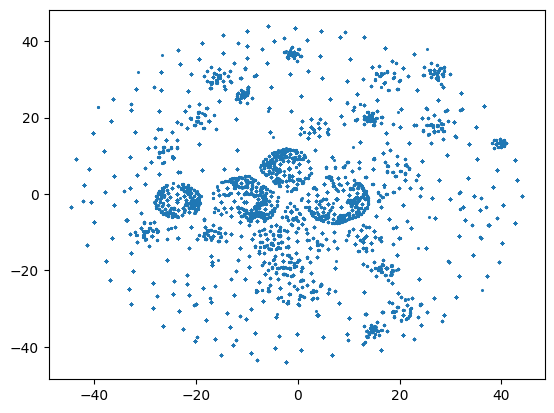

In [5]:
import matplotlib.pyplot as plt

plt.scatter(pca_value[:,0],pca_value[:,1],marker=".",s=6)
plt.show()

In [6]:
test

NameError: name 'test' is not defined

In [10]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,20,1)
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42,verbose=2)
    kmeans.fit(pca_value)
    distortions.append(kmeans.inertia_)

1
Initialization complete
Iteration 0, inertia 152302496.0.
Iteration 1, inertia 70358240.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 97721088.0.
Iteration 1, inertia 70358240.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 90757528.0.
Iteration 1, inertia 70358232.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 84249520.0.
Iteration 1, inertia 70358240.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 140953808.0.
Iteration 1, inertia 70358240.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 176183632.0.
Iteration 1, inertia 70358240.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 152488480.0.
Iteration 1, inertia 70358232.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inert

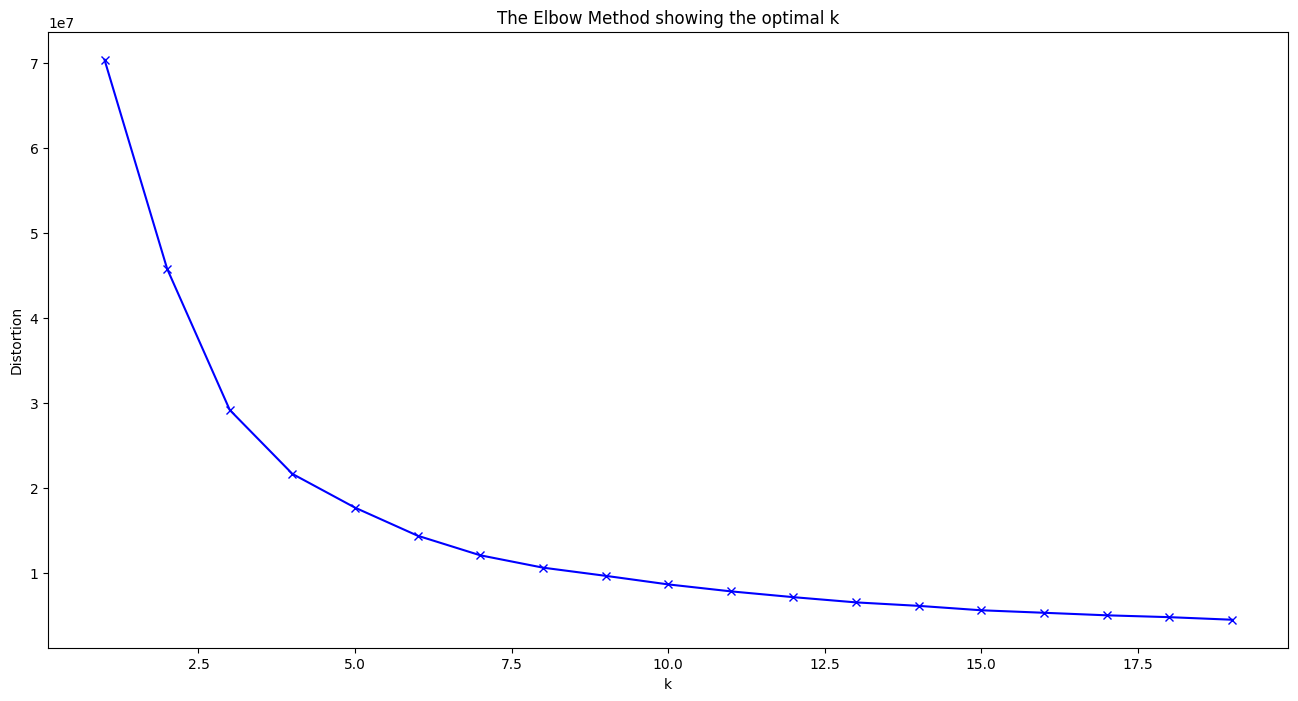

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=7,n_init=10,random_state=42,verbose=2)
kmeans.fit(pca_value)

Initialization complete
Iteration 0, inertia 14856530.0.
Iteration 1, inertia 13981731.0.
Iteration 2, inertia 13653519.0.
Iteration 3, inertia 13371347.0.
Iteration 4, inertia 13051423.0.
Iteration 5, inertia 12681683.0.
Iteration 6, inertia 12575359.0.
Iteration 7, inertia 12499093.0.
Iteration 8, inertia 12394033.0.
Iteration 9, inertia 12362772.0.
Iteration 10, inertia 12350863.0.
Iteration 11, inertia 12313590.0.
Iteration 12, inertia 12178931.0.
Iteration 13, inertia 12173384.0.
Iteration 14, inertia 12170488.0.
Converged at iteration 14: center shift 0.02343396469950676 within tolerance 0.037783465576171876.
Initialization complete
Iteration 0, inertia 18565720.0.
Iteration 1, inertia 13366552.0.
Iteration 2, inertia 12972893.0.
Iteration 3, inertia 12634276.0.
Iteration 4, inertia 12512463.0.
Iteration 5, inertia 12263341.0.
Iteration 6, inertia 12150218.0.
Iteration 7, inertia 12080792.0.
Iteration 8, inertia 12061265.0.
Iteration 9, inertia 12056262.0.
Converged at iteration 

KMeans(n_clusters=7, n_init=10, random_state=42, verbose=2)

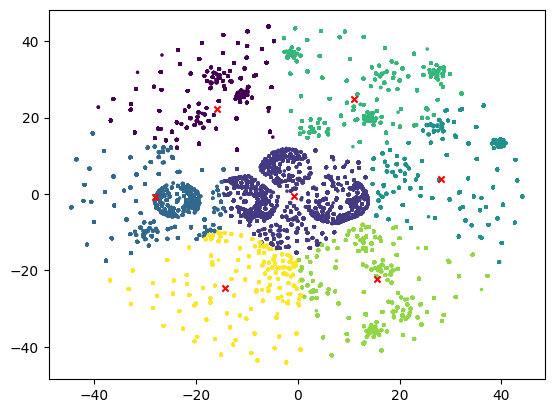

In [20]:
plt.scatter(pca_value[:,0],pca_value[:,1],c=kmeans.labels_,marker=".",s=10)
for center in kmeans.cluster_centers_:
    plt.scatter(center[0],center[1],marker='x',c="r",s=20)

In [26]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.175, min_samples=50,n_jobs=-1).fit(pca_value)
clustering.labels_

array([  0,   1,   2, ...,  -1, 124, 140])

In [27]:
np.unique(clustering.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

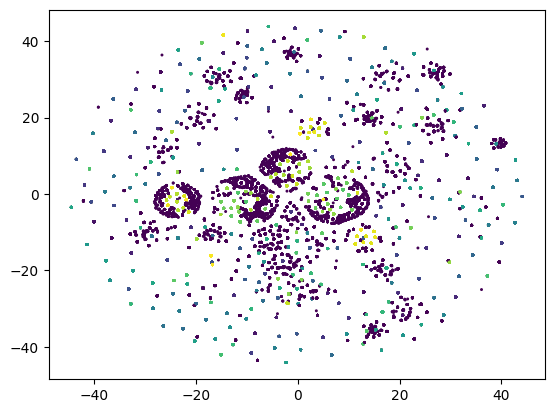

In [28]:
plt.scatter(pca_value[:,0],pca_value[:,1],c=clustering.labels_,marker=".",s=5)
plt.show()

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', scaler, num_columns)
    ]
)

In [25]:
test

NameError: name 'test' is not defined

In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=4, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df
df_std[num_columns] = preprocessor.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 6, iteration: 1/100, moves: 4492, ncost: 900863.2136721484
Run: 1, iteration: 1/100, moves: 11869, ncost: 735272.8754260984
Run: 5, iteration: 1/100, moves: 18178, ncost: 731644.450411419
Run: 4, iteration: 1/100, moves: 23349, ncost: 768740.8868150593
Run: 8, iteration: 1/100, 

KeyboardInterrupt: 

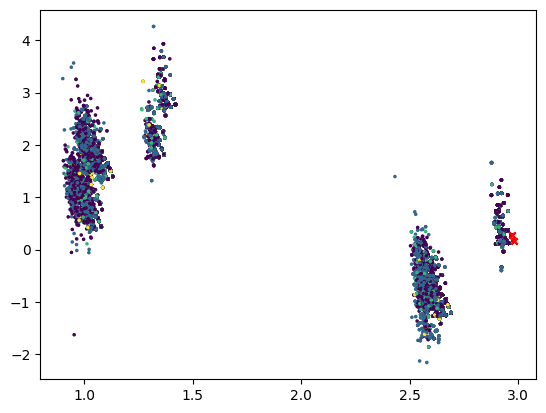

In [ ]:
centroides = pca.transform(pd.DataFrame(model_Kproto.cluster_centroids_,columns=df[num_columns+cat_columns].columns))
plt.scatter(pca_value[:,0],pca_value[:,1],c=model_Kproto.labels_,marker=".",s=10)
for center in centroides:
    plt.scatter(center[0],center[1],marker='x',c='r',s=20)